In [10]:


# Load data
df = pd.read_excel('../data/meta_ads_cleaned.xlsx', engine='openpyxl')


df.head()


,Campaign name,Campaign Delivery,Platforme,Device,Placement,Objective,Result indicator,Ad set budget,Ad set budget type,Amount spent,...,Cost per app install (USD),Adds to cart,Adds to cart conversion value,Cost per add to cart (USD),Checkouts Initiated,Checkouts initiated conversion value,Cost per checkout initiated (USD),Landing page views,Cost per landing page view (USD),Cost per purchase (USD)
0,SO/2024/0281 - Campagne Ramadan - Instagram - ...,inactive,Instagram,In-app,Feed,Awareness,reach,0.28,Using ad set budget,0.28,...,0.000000,0,0.0,0.00,0,0.0,0.000000,0,0.000000,0.00
1,SO/2024/0318 - Campagne Ramadan 2 - BC : - In...,not_delivering,Audience Network,In-app,Feed,App Installs,actions:mobile_app_install,2.63,Using ad set budget,2.63,...,2.630000,0,0.0,0.00,0,0.0,0.000000,0,0.000000,0.00
2,SO/2024/0576 - Orange - Lancement posts digita...,not_delivering,Audience Network,In-app,Feed,Sales,actions:offsite_conversion.fb_pixel_purchase,22.80,Using ad set budget,22.80,...,0.000000,60,1199.0,0.38,730,1756.0,0.031233,228,0.100000,4.56
3,SO/2024/0318 - Campagne Ramadan 2 - BC : - In...,not_delivering,Audience Network,In-app,Facebook Stories,App Installs,actions:mobile_app_install,25.83,Using ad set budget,25.83,...,0.993462,0,0.0,0.00,3,0.0,8.610000,0,0.000000,0.00
4,SO/2024/0556 - Orange - Lancement_campagne_Dat...,not_delivering,Instagram,Desktop,Feed,Awareness,reach,191.10,Using ad set budget,191.10,...,0.000000,5,0.0,38.22,103,0.0,1.855340,32,5.971875,0.00


In [11]:

print("Shape:", df.shape)


print("Columns:", df.columns.tolist())


print(df.isnull().sum())


Shape: (572, 68)
Columns: ['Campaign name', 'Campaign Delivery', 'Platforme', 'Device', 'Placement', 'Objective', 'Result indicator', 'Ad set budget', 'Ad set budget type', 'Amount spent', 'Attribution setting', 'Date created', 'Starts', 'Ends', 'Reach', 'Impressions', 'Frequency', 'Results', 'Cost per results', 'Thruplays rate %', 'Result rate', 'Views', 'Clicks (all)', 'Purchases', 'CPC (all) (USD)', 'CTR (all)', 'Cost per 1,000 Accounts Center accounts reached (USD)', 'CPM (cost per 1,000 impressions) (USD)', '3-second video plays rate per impressions', 'Page engagement', 'Facebook follows or likes', 'Post comments', 'Post engagements', 'Post reactions', 'Post saves', 'Post shares', 'Photo views', 'Cost per Page engagement (USD)', 'Cost per follow or like (USD)', 'Cost per post engagement (USD)', '3-second video plays', 'ThruPlays', 'Video plays at 25%', 'Video plays at 50%', 'Video plays at 75%', 'Video plays at 95%', 'Video plays at 100%', 'Video average play time', 'Video plays',

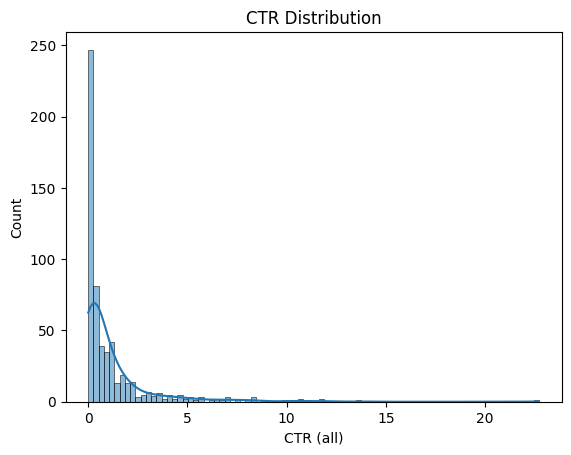

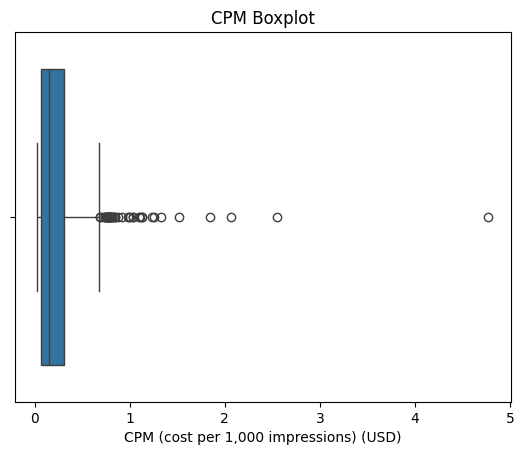

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['CTR (all)'], kde=True)
plt.title("CTR Distribution")
plt.show()

sns.boxplot(x=df['CPM (cost per 1,000 impressions) (USD)'])
plt.title("CPM Boxplot")
plt.show()


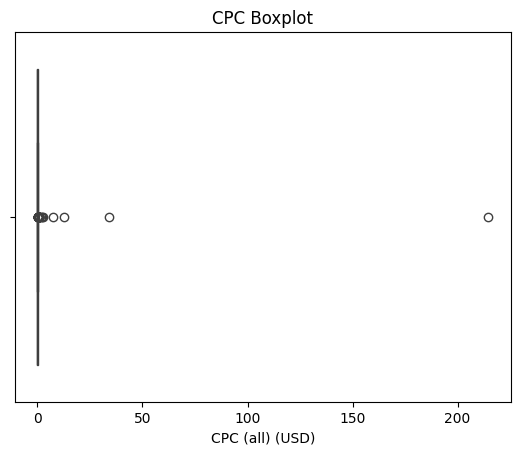

In [14]:
sns.boxplot(x=df['CPC (all) (USD)'])
plt.title("CPC Boxplot")
plt.show()

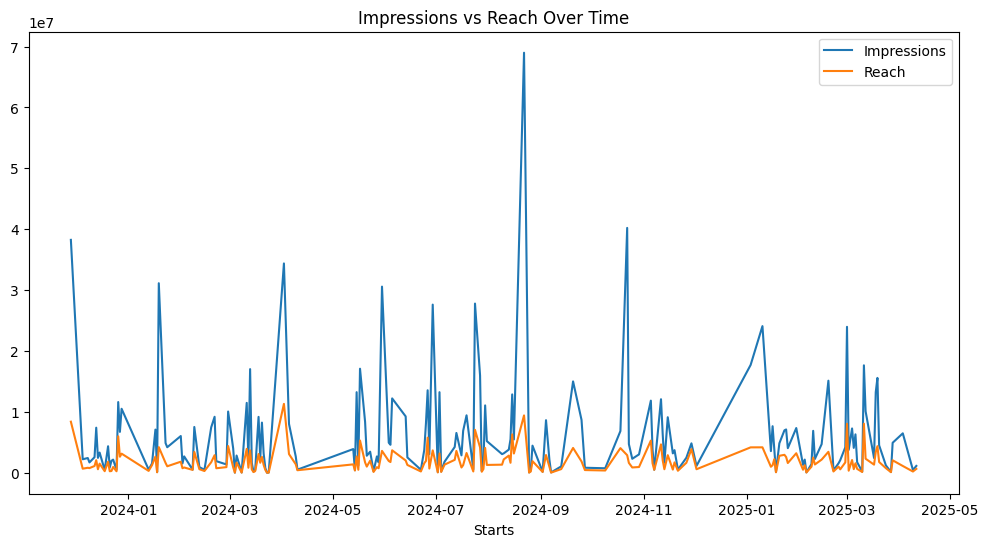

In [15]:
df['Starts'] = pd.to_datetime(df['Starts'])


daily = df.groupby(df['Starts'].dt.date).agg({
    'Amount spent': 'sum',
    'Reach': 'sum',
    'Impressions': 'sum',
    'CTR (all)': 'mean',
    'CPM (cost per 1,000 impressions) (USD)': 'mean'
})


daily[['Impressions', 'Reach']].plot(figsize=(12, 6), title="Impressions vs Reach Over Time")
plt.show()


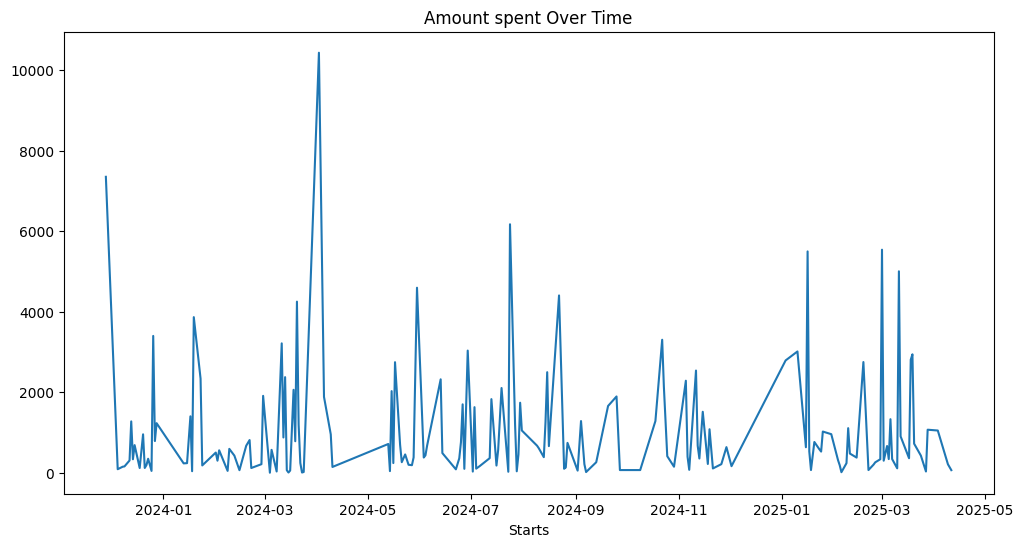

In [16]:

daily['Amount spent'].plot(figsize=(12, 6), title="Amount spent Over Time")
plt.show()


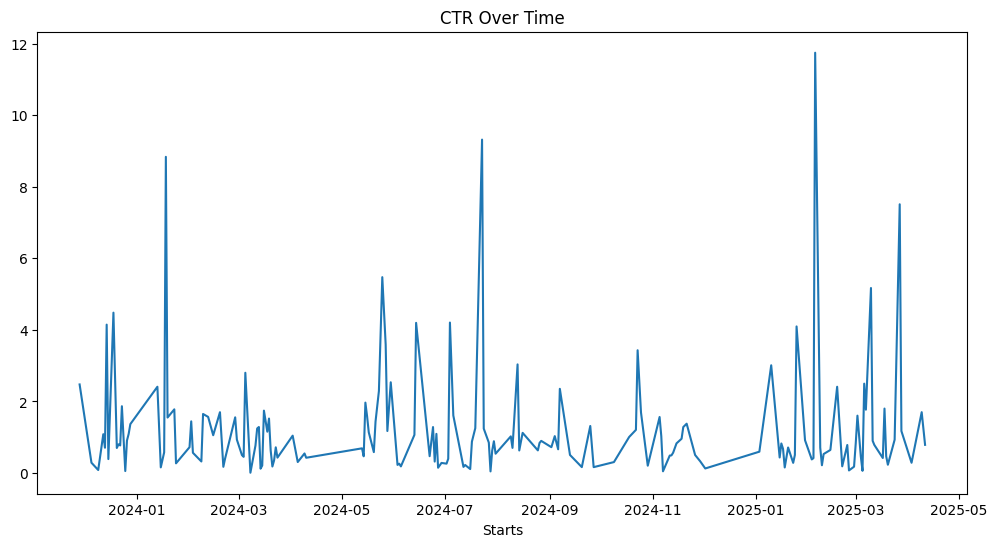

In [17]:
daily['CTR (all)'].plot(figsize=(12, 6), title="CTR Over Time")
plt.show()


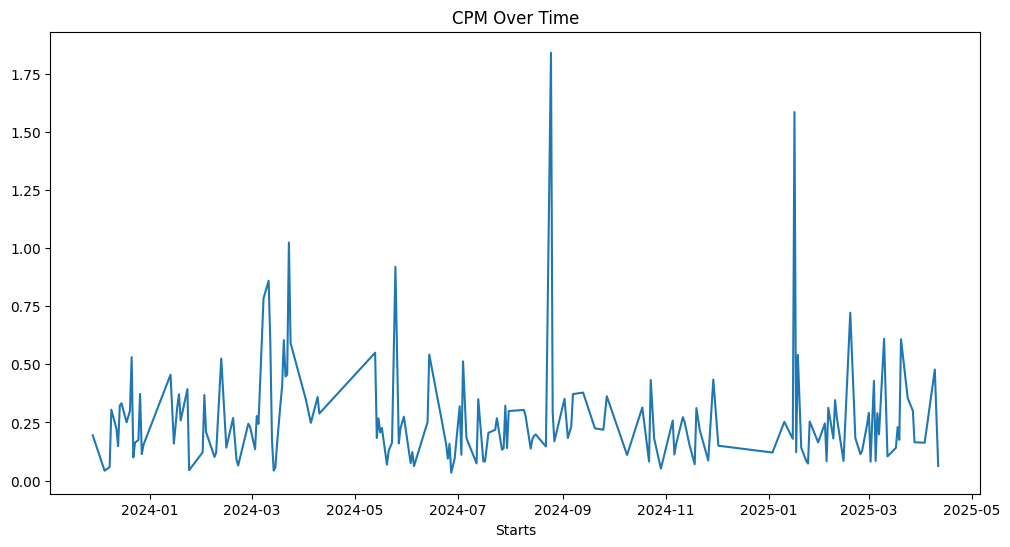

In [18]:
daily['CPM (cost per 1,000 impressions) (USD)'].plot(figsize=(12, 6), title="CPM Over Time")
plt.show()

In [19]:
# Calculate skewness for key numeric columns
df[['CTR (all)', 'CPC (all) (USD)', 'CPM (cost per 1,000 impressions) (USD)', 'Post engagements']].skew()


CTR (all)                                  4.322711
CPC (all) (USD)                           22.965644
CPM (cost per 1,000 impressions) (USD)     5.915443
Post engagements                           4.446205
dtype: float64

In [20]:
import numpy as np

# Add transformed columns
df['log_CPC'] = np.log1p(df['CPC (all) (USD)'])  # log(1 + x)
df['log_CPM'] = np.log1p(df['CPM (cost per 1,000 impressions) (USD)'])
df['log_engagements'] = np.log1p(df['Post engagements'])


In [21]:
# Calculate skewness for key numeric columns
df[['log_CPC', 'log_CPM', 'log_engagements']].skew()


log_CPC            11.102656
log_CPM             2.394810
log_engagements    -0.342659
dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
df[['scaled_CTR']] = scaler.fit_transform(df[['CTR (all)']])


In [26]:
df[['scaled_CTR']].skew()

scaled_CTR    4.322711
dtype: float64

## Skewness Summary:

- `CPC` remains highly skewed after log transform (Skewness: 11.10)
- `CPM` improved, but still skewed (Skewness: 2.39)
- `Post engagements` is close to normal after log transform
- `CTR` is extremely skewed (even after MinMax scaling)

### Next Step:
Handle skewness during Feature Engineering using:
- Advanced transformations (log, square root, etc.)
- Skew-tolerant models (e.g., Random Forest, XGBoost)
- Outlier clipping or capping if needed